# KOSOVO CUSTOMS
---
## Trading bilance based on tariffs
**Features**
- **VITI** -  Viti i importimit.
- **MUAJI** -  Muaji i importimit.
- **Regjimi IM4** -  Deklarata per qarkullim të lirë.
- **Origjina** -  Vendi nga po importohet produkti.
- **Kodi Tarifor** -  Kodi tarifor i produktit të importuar.
- **Sasia**: Sasia e përafërt të mallrave për t’u vendosur nën procedurë
- **Vlera Mallrave**: Vlera e përafërt në euro të mallrave për t’u vendosur nën procedurë
- **Netweight** - Pesha e një artikulli / produkti pa shtimin e paketimit
- **Taksa doganore** - Taksë e cila iu nënshtrohet mallrave me rastin e kalimit të kufirit dhe paguhet 10% në vlerë të mallit;
- **Taksa e akcizës** - Taksë e veçantë selektive që iu vihet një numri të caktuar të mallrave të tatueshme që lëshohen për konsum të lirë me qëllim të arritjes së efekteve të caktuara dhe paguhet në vlerë të mallit apo sipas njësisë matëse(specifike).
- **TVSH** - Taksë e cila mblidhet në kufi nga Shërbimi Doganor në emër të administratës tatimore dhe paguhet 18% në vlerë të mallit.
---
### Llogaritja e pagesave te detyrimeve
**Pagesat e tatimeve per mallrat mund te llogariten duke perdorur elementet ne vijim:**
- Pershkrimin tarifor dhe kursin e tatimit;
- Sasine; dhe/ose
- Vleren 

# IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

#Visualization
import seaborn as sns
sns.set_style("darkgrid")

#Normalization
from sklearn.preprocessing import MinMaxScaler

#Anomaly
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
from numpy.linalg import inv

#AutoRegression
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# DATA IMPORTING

In [2]:
df_import_2015 = pd.read_excel('DATA/Import/Import-2015.xlsx')

In [3]:
df_import_2016 = pd.read_excel('DATA/Import/Import-2016.xlsx')

In [4]:
df_import_2017 = pd.read_excel('DATA/Import/Import-2017.xlsx')

In [5]:
df_import_2018 = pd.read_excel('DATA/Import/Import-2018.xlsx')

In [6]:
df_import_2019 = pd.read_excel('DATA/Import/Import-2019.xlsx')

In [7]:
df_import_2020 = pd.read_excel('DATA/Import/Import-Janar-Dhjetor-2020.xlsx')

In [8]:
df_import_2021 = pd.read_excel('DATA/Import/Import-Janar-Shkurt-2021.xlsx')

In [9]:
import_df = pd.concat([df_import_2015,df_import_2016,df_import_2017,
                       df_import_2018,df_import_2019,df_import_2020,df_import_2021],
                      axis=0).reset_index(drop=True)

In [10]:
import_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183774 entries, 0 to 1183773
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   VITI            1183774 non-null  int64  
 1   MUAJI           1183774 non-null  int64  
 2   Regjimi         1183774 non-null  object 
 3   Origjina        1183774 non-null  object 
 4   Kodi Tarifor    1183329 non-null  object 
 5   Sasia           361886 non-null   float64
 6   Vlera Mallrave  1183774 non-null  float64
 7   Netweight       1183774 non-null  float64
 8   Taksa Doganës   1183774 non-null  float64
 9   Taksa Akcizës   1183774 non-null  float64
 10  Taksa TVSH-së   1183774 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 99.3+ MB


In [11]:
import_df.head()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
0,2015,1,IM4,TR - TURQIA,9603909900 - - - - Të tjera,NaN,813.909246,166.52,81.36,0.0,143.21
1,2015,1,IM4,TR - TURQIA,3506910000 - - - Ngjitës të bazuar në polimere...,NaN,3152.485200,750.00,315.24,0.0,554.83
2,2015,1,IM4,TR - TURQIA,3923900000 - - Të tjera,NaN,5411.210000,679.00,541.12,0.0,952.37
3,2015,1,IM4,TR - TURQIA,8421310090 - - - - Të tjera,NaN,9318.269960,1326.60,930.86,0.0,1638.86
4,2015,1,IM4,TR - TURQIA,6110909000 - - - Të tjera,59702.0,178002.399870,18329.97,17800.08,0.0,31328.24


# DATA VISUALIZATION

#### Plotting the top 10 countries with the most numbers of imported products

In [12]:
import_df['Origjina'].value_counts().head(10)

CN - KINA         135109
DE - GJERMANIA    116662
TR - TURQIA       113998
IT - ITALIA        90324
XS - SËRBIA        49221
CH - ZVICRRA       39790
PL - POLONIA       36859
SI - SLLOVENIA     31079
FR - FRANCA        29992
GR - GREQIA        27281
Name: Origjina, dtype: int64

In [13]:
plt.figure(figsize=(15,6))
import_df['Taksa Doganës'].sum()
import_df['Taksa Akcizës'].sum()
import_df['Taksa TVSH-së'].sum()

3349973076.6200013

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:title={'center':'The statistics of revenues collection separated as per the categories'}>

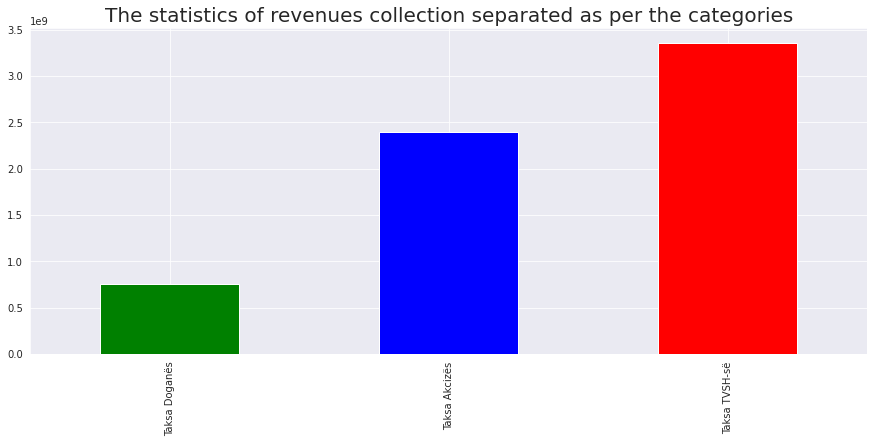

In [36]:
plt.figure(figsize=(15,6))
plt.title('The statistics of revenues collection separated as per the categories',fontsize=20)
import_df[['Taksa Doganës','Taksa Akcizës','Taksa TVSH-së']].sum().plot.bar(color=['g', 'b','r'])

Text(0, 0.5, 'Imported Products')

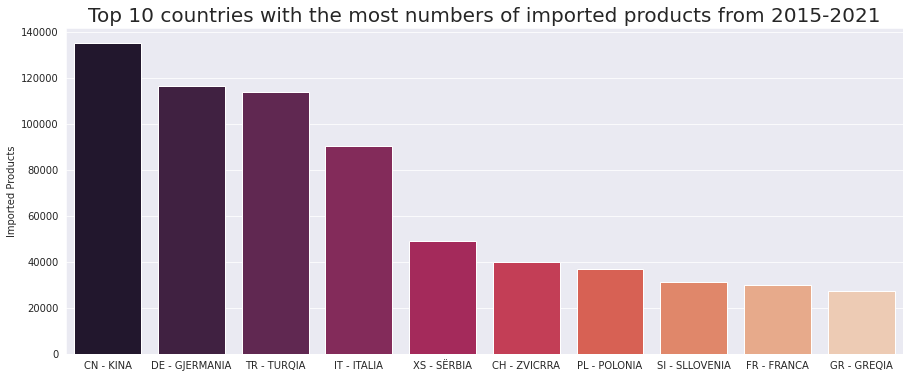

In [22]:
plt.figure(figsize=(15,6))
sea_df = import_df['Origjina'].value_counts().head(10)
sns.barplot(y='Origjina',x=pd.DataFrame(sea_df).index,data=pd.DataFrame(sea_df),palette='rocket')
plt.title('Top 10 countries with the most numbers of imported products from 2015-2021',fontsize=20)
plt.ylabel("Imported Products")

#### Plotting the graph for value of goods yearly

Text(0.5, 1.0, 'Vlera Mallrave from January-March per year 2015-2021')

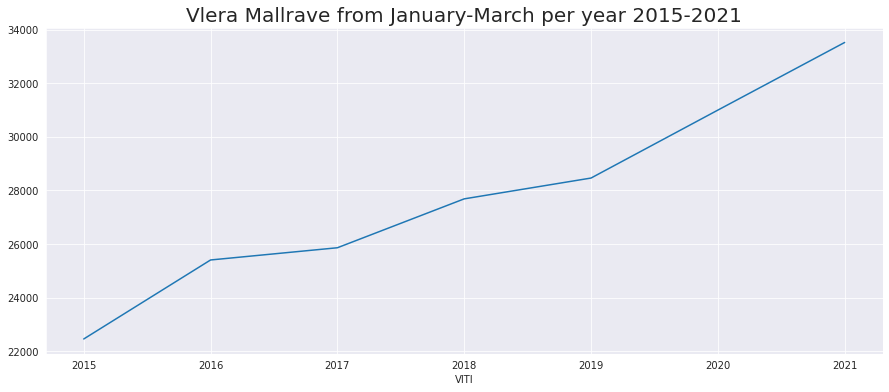

In [23]:
plt.figure(figsize=(15,6))
import_df[import_df['MUAJI'] < 3].groupby('VITI')['Vlera Mallrave'].count().plot()
plt.title('Vlera Mallrave from January-March per year 2015-2021',fontsize=20)

#### Plotting from January to March yearly incomes

In [24]:
import_df['Të hyrat'] = import_df['Taksa Doganës'] + import_df['Taksa Akcizës'] + import_df['Taksa TVSH-së']

<AxesSubplot:xlabel='VITI', ylabel='Të hyrat'>

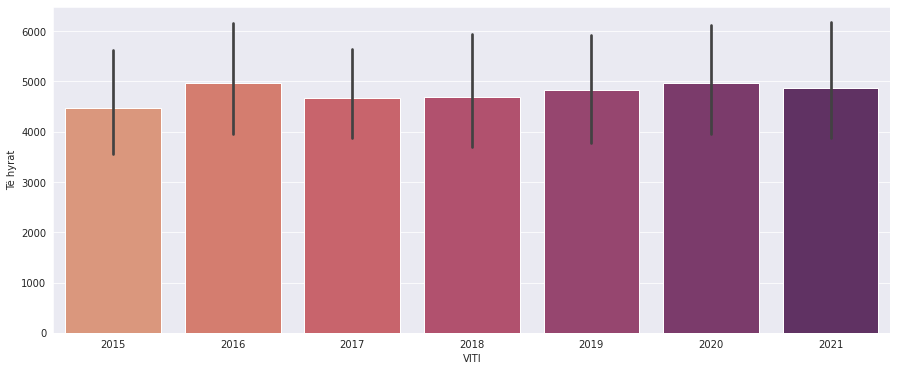

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(data=import_df[import_df['MUAJI'] < 3],x='VITI',y='Të hyrat',palette='flare')

#### Plotting incomes monthly

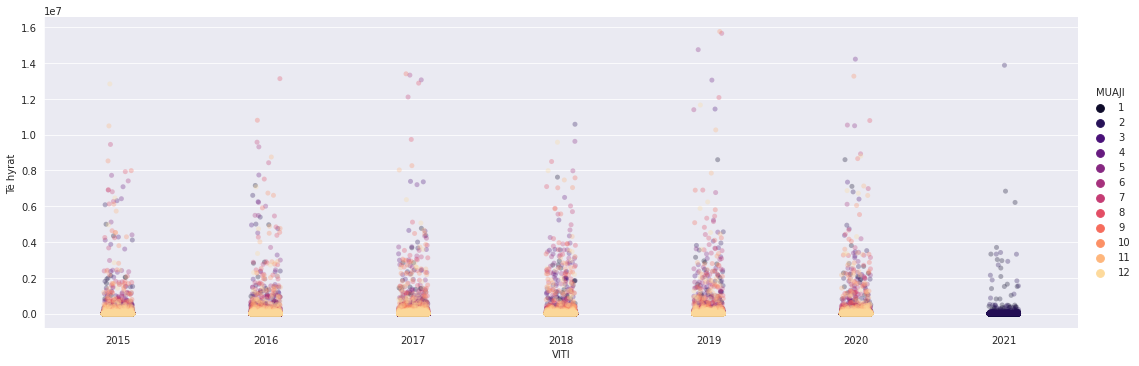

In [26]:
sns.catplot(x="VITI", y="Të hyrat",data=import_df,palette='magma',hue='MUAJI',alpha=0.3, height=5, aspect=3)

#### The total amount of incomes yearly from January to March

In [43]:
import_df[(import_df['VITI'] == 2021) & (import_df['MUAJI'] < 3)]['Të hyrat'].sum()

163386992.51999998

In [44]:
import_df[(import_df['VITI'] == 2020) & (import_df['MUAJI'] < 3)]['Të hyrat'].sum()

154256644.14000002

#### Value of goods entered on January of 2018

In [45]:
import_df[(import_df['MUAJI'] == 1)][import_df['VITI'] == 2018]['Vlera Mallrave'].sum()

193929442.60169834

#### Unique number of all products presented by Kodi Tarifor 

In [46]:
import_df['Kodi Tarifor'].nunique()

13990

# DATA PREPROCESSING

In [47]:
import_df.drop(['Regjimi','Origjina','Kodi Tarifor','Sasia','Vlera Mallrave','Netweight','Të hyrat'],axis=1,inplace=True)

In [48]:
import_df.head()

,VITI,MUAJI,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
0,2015,1,81.36,0.0,143.21
1,2015,1,315.24,0.0,554.83
2,2015,1,541.12,0.0,952.37
3,2015,1,930.86,0.0,1638.86
4,2015,1,17800.08,0.0,31328.24


In [49]:
import_df['revenue'] = import_df['Taksa Doganës'] + import_df['Taksa Akcizës'] + import_df['Taksa TVSH-së']

In [50]:
import_df.head()

,VITI,MUAJI,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,revenue
0,2015,1,81.36,0.0,143.21,224.57
1,2015,1,315.24,0.0,554.83,870.07
2,2015,1,541.12,0.0,952.37,1493.49
3,2015,1,930.86,0.0,1638.86,2569.72
4,2015,1,17800.08,0.0,31328.24,49128.32


In [51]:
import_df.drop(['Taksa Doganës','Taksa Akcizës','Taksa TVSH-së'],axis=1,inplace=True)

In [52]:
import_df.head()

,VITI,MUAJI,revenue
0,2015,1,224.57
1,2015,1,870.07
2,2015,1,1493.49
3,2015,1,2569.72
4,2015,1,49128.32


In [53]:
mi_df = import_df.groupby([(import_df['VITI']),(import_df.MUAJI)]).sum()

In [54]:
mi_df.head()

revenue
VITI MUAJI             
2015 1      48695957.98
     2      51650534.27
     3      64445728.37
     4      74244317.65
     5      77062086.37

In [55]:
df = mi_df.reset_index(level=[0,1])

In [56]:
df.head()

,VITI,MUAJI,revenue
0,2015,1,48695957.98
1,2015,2,51650534.27
2,2015,3,64445728.37
3,2015,4,74244317.65
4,2015,5,77062086.37


In [57]:
new_col = df[['VITI','MUAJI']].apply(lambda x : '{}-{}'.format(x[0],x[1]), axis=1)
df.insert(loc=0, column='date', value=new_col)
df.drop(['VITI','MUAJI'],axis=1,inplace=True)

In [58]:
df.head()

,date,revenue
0,2015-1,48695957.98
1,2015-2,51650534.27
2,2015-3,64445728.37
3,2015-4,74244317.65
4,2015-5,77062086.37


In [59]:
df_income = df.copy()

In [60]:
df_income['date'] = pd.to_datetime(df_income.date)

In [61]:
df_income.head()

,date,revenue
0,2015-01-01,48695957.98
1,2015-02-01,51650534.27
2,2015-03-01,64445728.37
3,2015-04-01,74244317.65
4,2015-05-01,77062086.37


In [62]:
df_income.date[1]

Timestamp('2015-02-01 00:00:00')

In [63]:
df_income.set_index("date",inplace=True)

In [64]:
df_income

,revenue
date,
2015-01-01,4.869596e+07
2015-02-01,5.165053e+07
2015-03-01,6.444573e+07
2015-04-01,7.424432e+07
2015-05-01,7.706209e+07
...,...
2020-10-01,1.000806e+08
2020-11-01,8.779003e+07
2020-12-01,1.097571e+08


Text(0.5, 1.0, 'Revenue from Import Taxes Yearly')

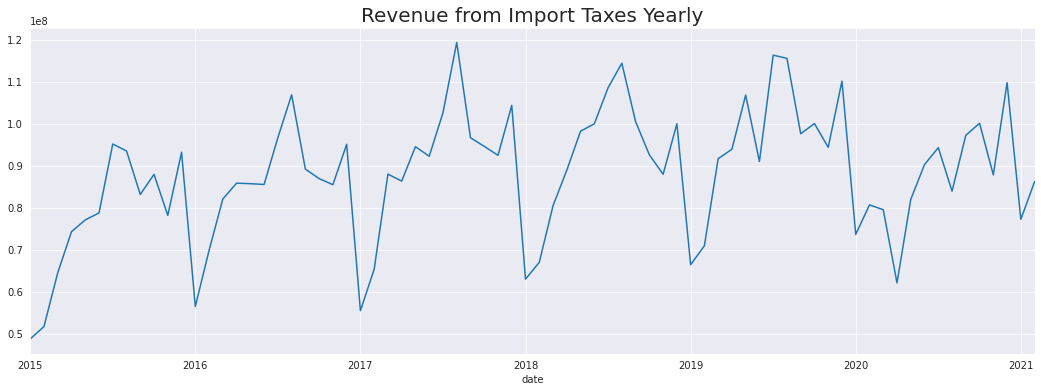

In [65]:
plt.figure(figsize=(18, 6))
df_income['revenue'].plot()
plt.title('Revenue from Import Taxes Yearly',fontsize=20)

# DATA NORMALIZATION

In [66]:
import_df['revenue'].values.reshape(-1,1)

array([[ 224.57],
       [ 870.07],
       [1493.49],
       ...,
       [   0.  ],
       [1113.93],
       [   0.  ]])

In [67]:
scaler = MinMaxScaler()
df_income['scaled'] = scaler.fit_transform(df['revenue'].values.reshape(-1,1))

## AutoRegressive AR Model

In [68]:
df = df_income.drop('revenue',axis=1)

### Removing the trend

In [69]:
df.shift(1)

,scaled
date,
2015-01-01,NaN
2015-02-01,0.000000
2015-03-01,0.041822
2015-04-01,0.222937
2015-05-01,0.361635
...,...
2020-10-01,0.686943
2020-11-01,0.727345
2020-12-01,0.553373


In [70]:
revenue_diff = df.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

In [71]:
revenue_diff = revenue_diff[1:]
revenue_diff.head()

,scaled
date,
2015-02-01,0.041822
2015-03-01,0.181115
2015-04-01,0.138698
2015-05-01,0.039885
2015-06-01,0.023518


<AxesSubplot:xlabel='date'>

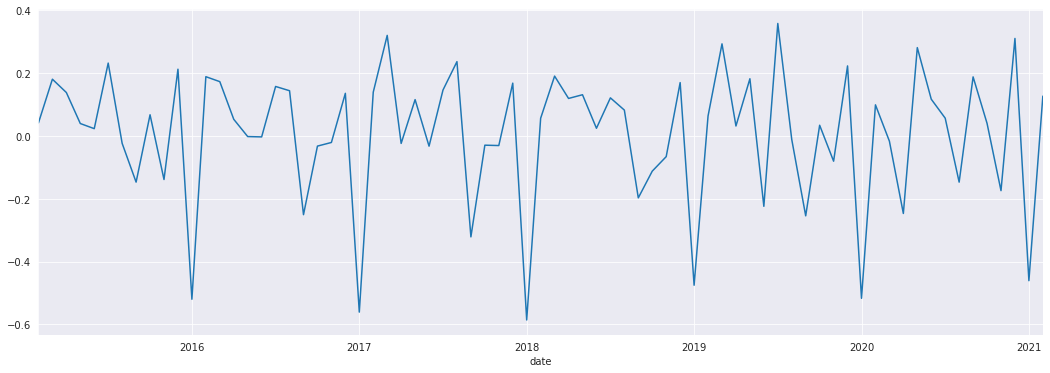

In [72]:
plt.figure(figsize=(18, 6))
revenue_diff['scaled'].plot()

In [73]:
revenue_diff.size

73

In [74]:
X = df.values
train = X[0:50] 
test = X[49:] # 25 
predictions = []

In [75]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [76]:
predictions = model_ar_fit.predict(start=49,end=73)

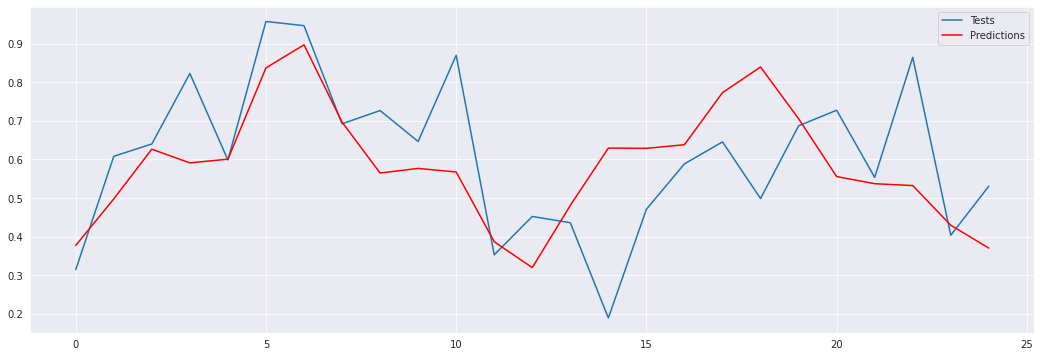

In [77]:
plt.figure(figsize=(18, 6))
plt.plot(test)
plt.plot(predictions,color='red')
plt.legend(labels=['Tests', 'Predictions'],loc='upper right')

In [78]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(f'Test MSE: {mse}\nTest RMSE: {rmse}')

Test MSE: 0.030018760485190678
Test RMSE: 0.1732592291486681


## ARIMA Model
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [115]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

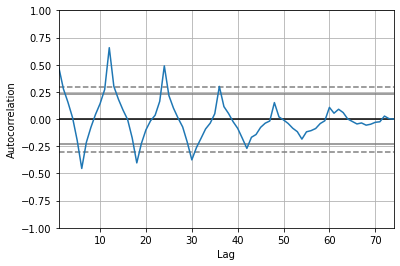

In [116]:
autocorrelation_plot(df)

In [117]:
df.index = df.index.to_period('M')

               0
count  74.000000
mean    0.008628
std     0.195658
min    -0.513011
25%    -0.115986
50%     0.049014
75%     0.155591
max     0.285491


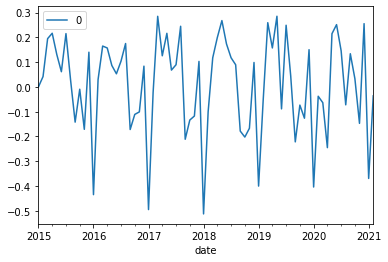

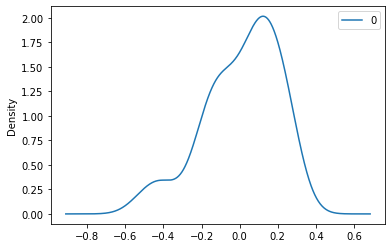

In [118]:
# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
# print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
# density plot of residuals
residuals.plot(kind='kde')
# summary stats of residuals
print(residuals.describe())

predicted=0.666483, expected=0.250433
predicted=0.328722, expected=0.314240
predicted=0.336325, expected=0.607945
predicted=0.540414, expected=0.639926
predicted=0.478421, expected=0.822462
predicted=0.743122, expected=0.598535
predicted=0.679510, expected=0.957216
predicted=0.913602, expected=0.946311
predicted=0.939952, expected=0.692100
predicted=0.755646, expected=0.726493
predicted=0.800828, expected=0.646352
predicted=0.709520, expected=0.869769
predicted=0.767404, expected=0.352749
predicted=0.471457, expected=0.452167
predicted=0.487345, expected=0.435881
predicted=0.467403, expected=0.189204
predicted=0.214232, expected=0.470917
predicted=0.322575, expected=0.588338
predicted=0.502164, expected=0.645305
predicted=0.569052, expected=0.498460
predicted=0.549101, expected=0.686943
predicted=0.701706, expected=0.727345
predicted=0.704821, expected=0.553373
predicted=0.594733, expected=0.864315
predicted=0.789990, expected=0.403515
predicted=0.570462, expected=0.530640
Test RMSE: 0

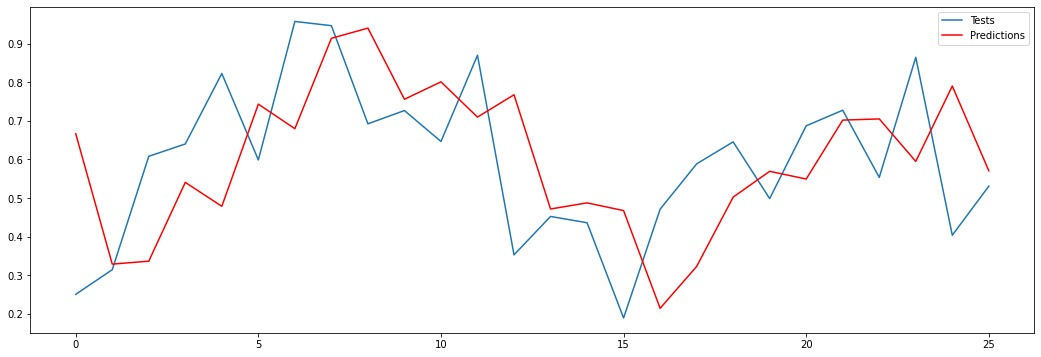

In [122]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)] #  23 - testim 23 
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(18,6))
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(labels=['Tests', 'Predictions'],loc='upper right')

## Detecting the anomaly

In [83]:
from datetime import datetime
start_date = datetime(2015,1,1)
end_date = datetime(2021,4,1)

Text(0.5, 1.0, 'Revenue from Import Taxes Yearly')

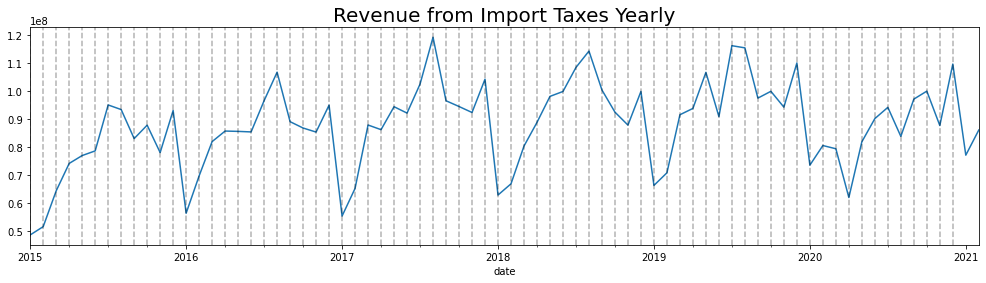

In [114]:
fig = plt.figure(figsize=(17, 4))
df_income['revenue'].plot()
for year in range(start_date.year,end_date.year):
    for i in range(1,13):
        plt.axvline(pd.to_datetime(str(year)+'-'+str(i)+'-01'), color='k', linestyle='--', alpha=0.3)
plt.title('Revenue from Import Taxes Yearly',fontsize=20)

In [77]:
delta = df.copy()
meanValue = delta.mean()
covValue = delta.cov()

In [78]:
X = delta.to_numpy()
S = covValue.to_numpy()
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

In [79]:
knn = 4
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.to_numpy())
distances, indices = nbrs.kneighbors(delta.to_numpy())

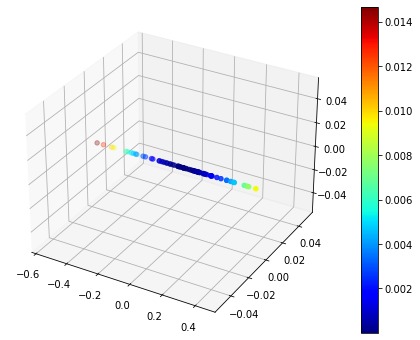

In [80]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.scaled,ys=0,c=anomaly_score,cmap='jet')
fig.colorbar(p)

In [81]:
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(10,'Anomaly score')

,scaled,Anomaly score
date,,
2015-01,-0.554704,0.014689
2015-02,-0.512883,0.012557
2017-01,-0.459293,0.010070
2017-08,0.445296,0.009466
2016-01,-0.445069,0.009456
2019-07,0.402512,0.007734
2019-08,0.391607,0.007321
2018-08,0.375278,0.006723
2020-04,-0.365500,0.006377


<AxesSubplot:xlabel='date'>

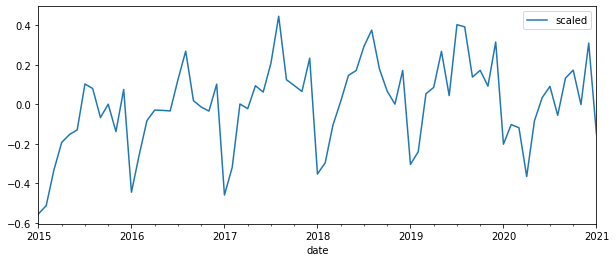

In [85]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ts = delta[0:73]
ts.plot.line(ax=ax)

In [86]:
month_deviations = delta.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

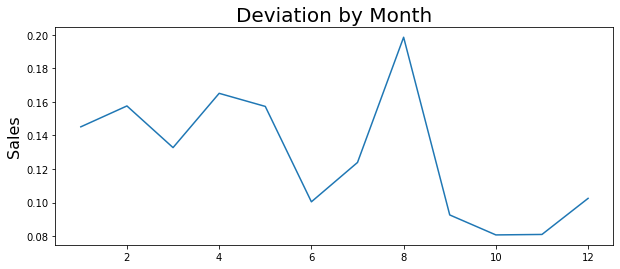

In [87]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## Reducing anomaly

In [162]:
april_data = delta[delta.index.month == 4]

In [163]:
april_data

,scaled
date,
2015-04,-0.193069
2016-04,-0.029266
2017-04,-0.022228
2018-04,0.014549
2019-04,0.085222
2020-04,-0.365500


In [164]:
pandemic_anomaly = april_data[april_data.index.year == 2020].index.values[0]

In [165]:
pandemic_anomaly

Period('2020-04', 'M')

In [156]:
adjusted_data = delta.copy()

In [166]:
adjusted_data.loc[pandemic_anomaly] = april_data[(april_data.index != pandemic_anomaly)].mean()

In [167]:
adjusted_data.loc[adjusted_data.index == pandemic_anomaly]

,scaled
date,
2020-04,-0.028959


## Prediction after adjusting the anomaly

### AutoRegression

In [148]:
X = adjusted_data.values
X.size

74

In [159]:
train = X[0:50] # 50 data as train data
test = X[49:]  # 24 data as test data
predictions = []

In [160]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

Test MSE: 0.02269941920222643
Test RMSE: 0.15066326427575644


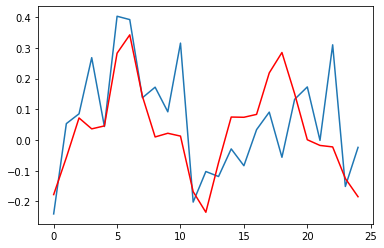

In [113]:
predictions = model_ar_fit.predict(start=49,end=73)
plt.plot(test)
plt.plot(predictions,color='red')
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(f'Test MSE: {mse}\nTest RMSE: {rmse}')

### ARIMA

               0
count  73.000000
mean   -0.000807
std     0.191903
min    -0.514080
25%    -0.122188
50%     0.055593
75%     0.127705
max     0.288692


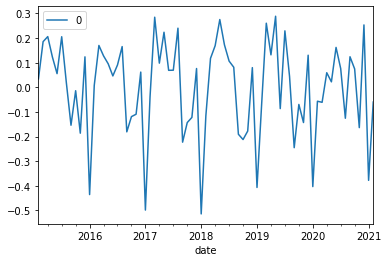

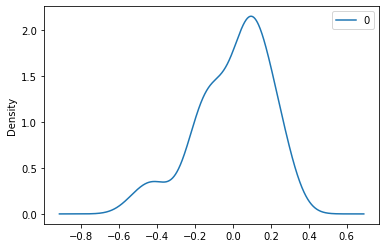

In [108]:
# fit model
model = ARIMA(adjusted_data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
# print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
# density plot of residuals
residuals.plot(kind='kde')
# summary stats of residuals
print(residuals.describe())

predicted=0.132237, expected=-0.304271
predicted=-0.215481, expected=-0.240464
predicted=-0.209462, expected=0.053241
predicted=-0.000248, expected=0.085222
predicted=-0.061306, expected=0.267758
predicted=0.207415, expected=0.043830
predicted=0.142695, expected=0.402512
predicted=0.377828, expected=0.391607
predicted=0.404447, expected=0.137395
predicted=0.220086, expected=0.171789
predicted=0.265033, expected=0.091648
predicted=0.170947, expected=0.315065
predicted=0.231304, expected=-0.201956
predicted=-0.071313, expected=-0.102537
predicted=-0.056833, expected=-0.118823
predicted=-0.078097, expected=-0.028959
predicted=-0.125630, expected=-0.083787
predicted=-0.132288, expected=0.033633
predicted=0.018934, expected=0.090601
predicted=0.082172, expected=-0.056244
predicted=-0.003372, expected=0.132239
predicted=0.113284, expected=0.172641
predicted=0.171774, expected=-0.001331
predicted=0.043206, expected=0.309611
predicted=0.249426, expected=-0.151189
predicted=0.043269, expected=-

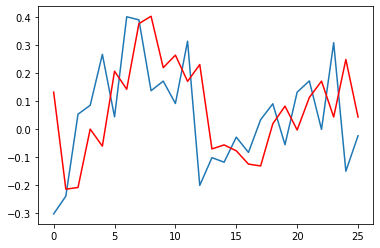

In [109]:
# split into train and test sets
X = adjusted_data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')